This is where the fun begins

#### Import necessary libraries:

In [111]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np
import pandas as pd 

#### Enable a data cache (the FastF1 library moves a lot of data)

In [112]:
ff1.Cache.enable_cache('cache') 

In [113]:
year, grand_prix, session = 2021, 'Monza', 'R'

race = ff1.get_session(year, grand_prix, session)
race.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '47', '9', '44', '33', '10', '22']


#### Specify the drivers we care about: Ricciardo, Norris, Hamilton, and Verstappen

In [114]:
driver_1, driver_2, driver_3, driver_4 = 'RIC', 'NOR', 'HAM', 'VER'

#### Next, we need to convert our drivers' laptimes from the `timedelta` datatype into floats so that we can chart them. We'll also trim the in- and out-laps from our dataframe as they skew the overall pace.

In [115]:
race.laps['LapTimeSeconds'] = race.laps['LapTime'].dt.total_seconds()

# laps = race.laps.loc[(race.laps['PitOutTime'].isnull() & race.laps['PitInTime'].isnull())]

In [116]:
race.laps.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeSeconds
0,0 days 01:03:52.443000,3,NaT,1.0,0 days 00:25:09.902000,NaT,NaT,0 days 00:00:29.470000,0 days 00:00:38.561000,NaT,...,1.0,True,1,0 days 01:02:14.632000,McLaren,RIC,26,False,2021-09-12 13:03:16.241,NaN
1,0 days 01:05:23.188000,3,0 days 00:01:30.745000,2.0,NaT,NaT,0 days 00:00:32.860000,0 days 00:00:29.263000,0 days 00:00:28.622000,0 days 01:04:25.303000,...,2.0,True,1,0 days 01:03:52.443000,McLaren,RIC,67,False,2021-09-12 13:04:54.052,90.745
2,0 days 01:06:49.514000,3,0 days 00:01:26.326000,3.0,NaT,NaT,0 days 00:00:28.357000,0 days 00:00:29.409000,0 days 00:00:28.560000,0 days 01:05:51.545000,...,3.0,True,1,0 days 01:05:23.188000,McLaren,RIC,1,True,2021-09-12 13:06:24.797,86.326
3,0 days 01:08:15.827000,3,0 days 00:01:26.313000,4.0,NaT,NaT,0 days 00:00:28.325000,0 days 00:00:29.399000,0 days 00:00:28.589000,0 days 01:07:17.839000,...,4.0,True,1,0 days 01:06:49.514000,McLaren,RIC,1,True,2021-09-12 13:07:51.123,86.313
4,0 days 01:09:42.237000,3,0 days 00:01:26.410000,5.0,NaT,NaT,0 days 00:00:28.499000,0 days 00:00:29.329000,0 days 00:00:28.582000,0 days 01:08:44.326000,...,5.0,True,1,0 days 01:08:15.827000,McLaren,RIC,1,True,2021-09-12 13:09:17.436,86.410


In [117]:
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)
laps_driver_3 = race.laps.pick_driver(driver_3)
laps_driver_4 = race.laps.pick_driver(driver_4)

drivers_to_visualize = ['RIC', 'NOR', 'HAM', 'VER']
visualized_teams = []

In [118]:
# Trying to programatically extract safety car laps to highlight x ranges with non-representative laptimes
# sc_laps = laps_driver_1.loc[laps_driver_1['TrackStatus']] == '4'

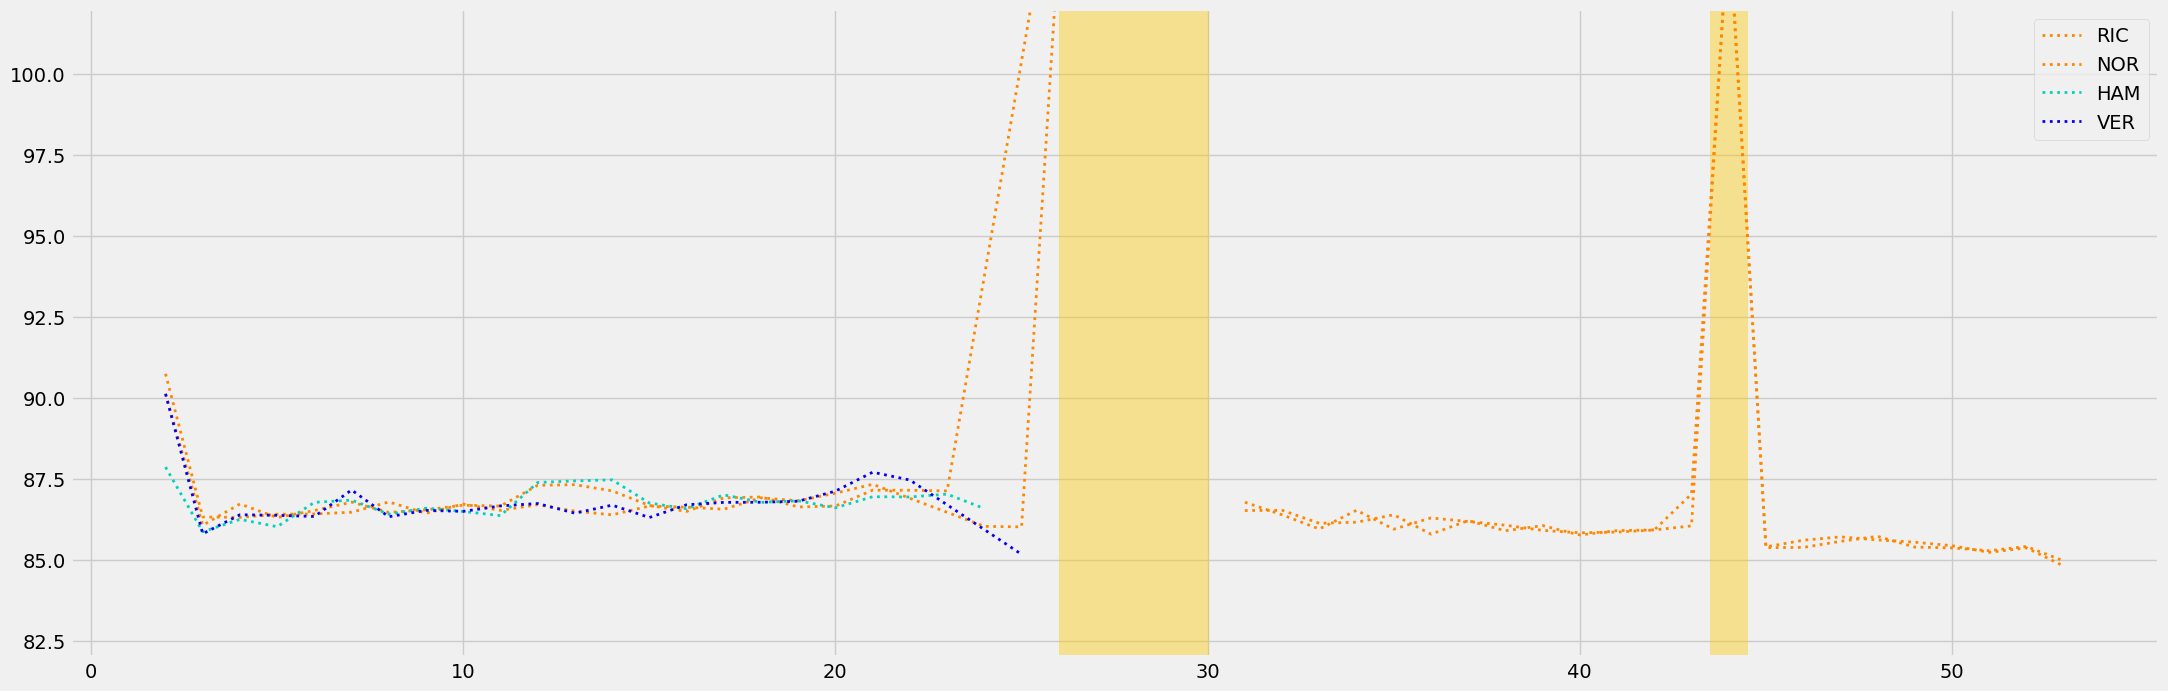

In [124]:
sc_yellow = '#ffca00'
# plt.style.use('fivethirtyeight')
plt.figure(figsize = (24, 8))
# Append labels
plt.xlabel = 'Lap Number'
plt.ylabel = 'Laptime'
# Set title
plt.title = 'Lap-by-lap pace'
# Highlight Safety Car & Virtual Safety Car laps in F1's Safety Car Yellow
plt.axvspan(26, 30, color=sc_yellow, alpha=0.4)
plt.axvspan(43.5, 44.5, color=sc_yellow, alpha=0.4)
plt.ylim(82, 102)

laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize]

for driver in drivers_to_visualize:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    # driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']

    y = driver_laps['LapTimeSeconds']

    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    plt.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth = 2)

    # Generate legend
    plt.legend()
    
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)


In [77]:
laps_driver_2.to_csv("landolaps.csv")

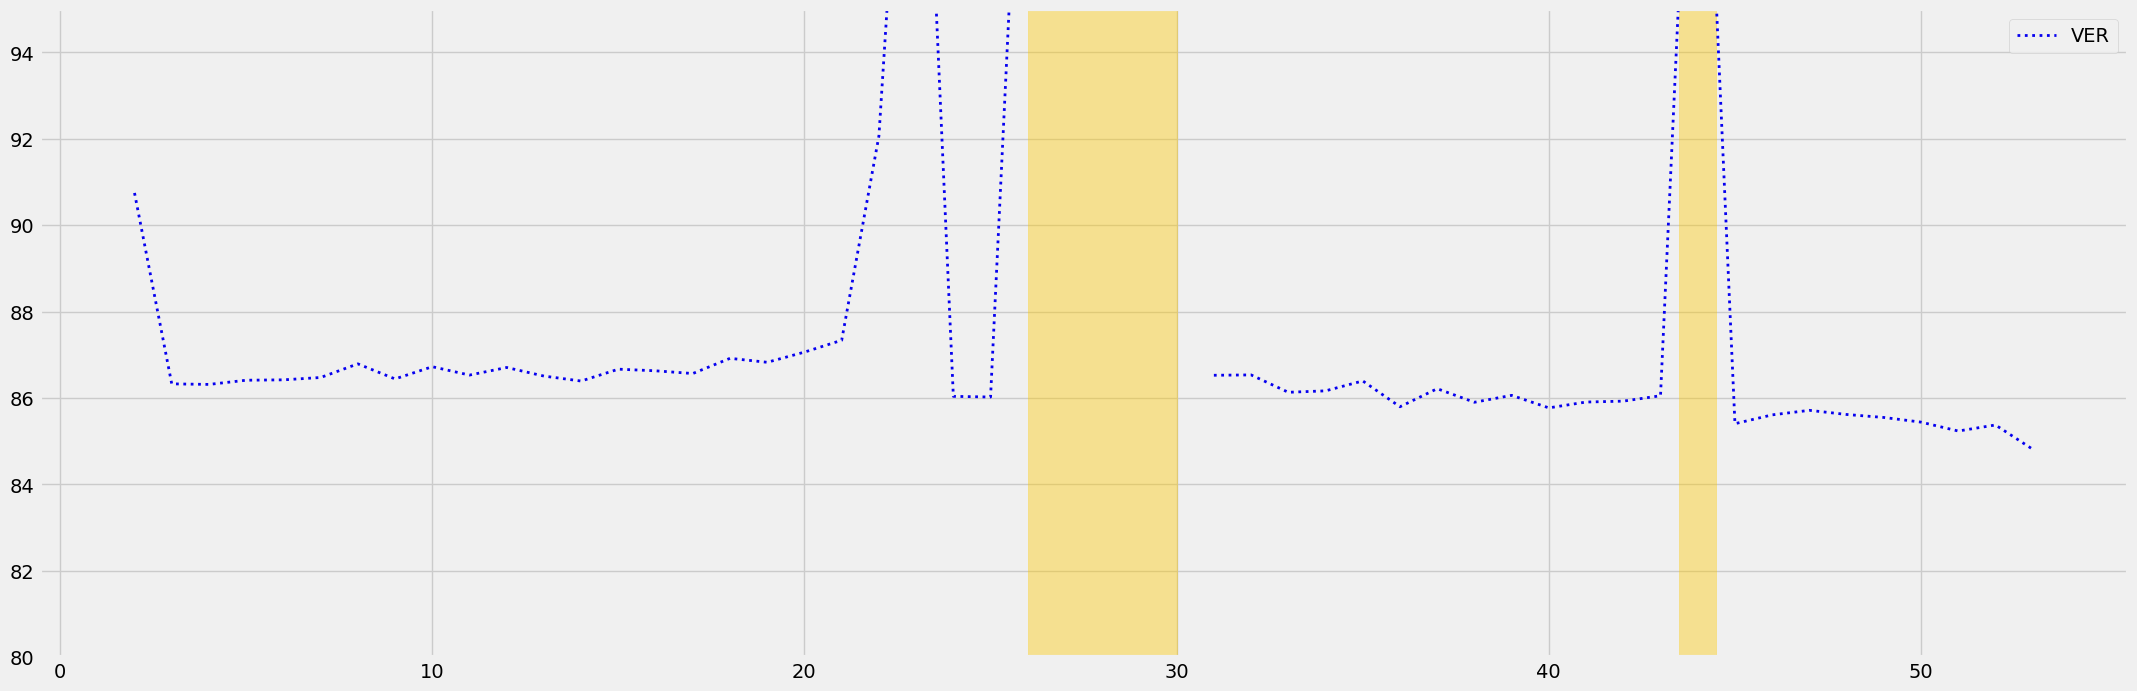

In [122]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize = (24, 8))
# Append labels
plt.xlabel = 'Lap Number'
plt.ylabel = 'Laptime'
# Set title
plt.title = 'Lap-by-lap pace'
# Highlight Safety Car & Virtual Safety Car laps in F1's Safety Car Yellow
plt.axvspan(26, 30, color=sc_yellow, alpha=0.4)
plt.axvspan(43.5, 44.5, color=sc_yellow, alpha=0.4)
plt.ylim(80, 95)

# laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize]

# driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]

# Select all the laps from that driver
# driver_laps = driver_laps.dropna()

# Extract the team for coloring purploses
team = pd.unique(driver_laps['Team'])[0]

# X-coordinate is the lap number
x = laps_driver_1['LapNumber']

y = laps_driver_1['LapTimeSeconds']

# Make sure that two teammates don't get the same line style
linestyle = '-' if team not in visualized_teams else ':'

# Plot the data
plt.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth = 2)

# Generate legend
plt.legend()

# Add the team to the visualized teams variable so that the next time the linestyle will be different
visualized_teams.append(team)